In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Task #1 Merging 12 months on sales into a single CSV file

In [2]:



files = [file for file in os.listdir('./Sales_Data')]

sales_2019 = pd.DataFrame()

for file in files:
    data = pd.read_csv("./Sales_Data/" + file)
    sales_2019 = pd.concat([sales_2019, data])
    
sales_2019.to_csv('Sales_Data_2019.csv', index=False)



In [3]:
sales_2019 = pd.read_csv("Sales_Data_2019.csv")

# Data Cleaning

## - Remove row with Nan

In [4]:
nan_df = sales_2019[sales_2019.isna().any(axis=1)]

sales_2019 = sales_2019.dropna(how = 'all')
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


## - Finding and removing "0r"

In [41]:
sales_2019 = sales_2019[sales_2019["Order Date"].str[0:2] != "0r"]

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


## - Changing data types

In [104]:
sales_2019["Month"] = sales_2019["Month"].astype('int')

sales_2019["Price Each"] = sales_2019["Price Each"].astype('float')

sales_2019["Quantity Ordered"] = sales_2019["Quantity Ordered"].astype('int')

# Exploratory Data Analysis

In [6]:
sales_2019.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [7]:
sales_2019["Order ID"].count()


185950

## Count of each product

In [13]:
sales_2019.groupby(by="Product").count()[["Quantity Ordered"]]

,Quantity Ordered
Product,
20in Monitor,4101
27in 4K Gaming Monitor,6230
27in FHD Monitor,7507
34in Ultrawide Monitor,6181
AA Batteries (4-pack),20577
AAA Batteries (4-pack),20641
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
Flatscreen TV,4800


## Average price for each product

In [20]:
sales_2019.groupby(by="Product").mean()["Price Each"]

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

## Correlation between price and number of orders

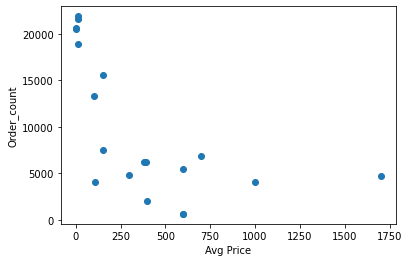

In [31]:
import matplotlib.pyplot as plt

Mean_price = pd.DataFrame(sales_2019.groupby(by="Product").mean()["Price Each"])
#
#Mean_price["Price Each"]

Total_orders = pd.DataFrame(sales_2019.groupby(by="Product").count()[["Quantity Ordered"]])

Total_orders["Quantity Ordered"]

plt.scatter(Mean_price["Price Each"],Total_orders["Quantity Ordered"])
plt.ylabel("Order_count")
plt.xlabel("Avg Price")
plt.show()

# Thre is no correlation between the price and number of order for the products


## Task #2 Add Month Column


In [43]:
sales_2019["Month"] = sales_2019["Order Date"].str[0:2]

sales_2019["Month"] = sales_2019["Month"].astype('int')

sales_2019["Price Each"] = sales_2019["Price Each"].astype('float')

sales_2019 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


## Task #3 Add a sales column

In [63]:
sales_2019["Sales"] = sales_2019["Quantity Ordered"].astype('float')*sales_2019["Price Each"]

sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task #4: Add a city column

In [86]:
sales_2019["City"] = sales_2019["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split()[-2])

    
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


#### Question 1: What was the best month for sales? How much was earned that month?

In [59]:
monthly_sales = sales_2019.groupby("Month").sum()
monthly_sales

,Price Each,Sales
Month,,
1,1811768.38,1822256.73
2,2188884.72,2202022.42
3,2791207.83,2807100.38
4,3367671.02,3390670.24
5,3135125.13,3152606.75
6,2562025.61,2577802.26
7,2632539.56,2647775.76
8,2230345.42,2244467.88
9,2084992.09,2097560.13


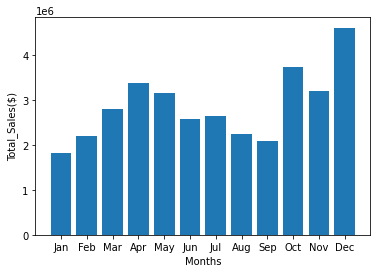

In [62]:
x = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y = monthly_sales["Sales"]

plt.bar(x,y)
plt.xlabel("Months")
plt.ylabel("Total_Sales($)")
plt.show()

# Months of Dec has the highest sales 

#### Question #2 What city had the highest number of sales?

In [93]:
city_sales = sales_2019.groupby("City").sum()

city_sales

,Price Each,Month,Sales
City,,,
Atlanta GA,2779908.20,104794,2795498.58
Austin TX,1809873.61,69829,1819581.75
Boston MA,3637409.77,141112,3661642.01
Dallas TX,2752627.82,104620,2767975.40
Los Angeles CA,5421435.23,208325,5452570.80
New York City NY,4635370.83,175741,4664317.43
Portland ME,447189.25,17144,449758.27
Portland OR,1860558.22,70621,1870732.34
San Francisco CA,8211461.74,315520,8262203.91


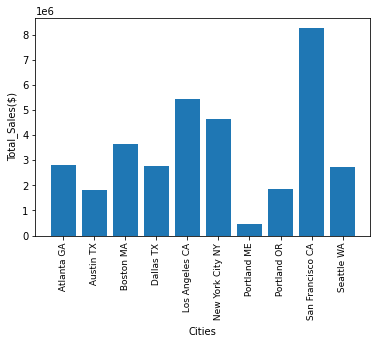

In [98]:
cities = sales_2019["City"].unique()
cities.sort()
y = city_sales["Sales"]

plt.bar(cities,y)
plt.xlabel("Cities")
plt.ylabel("Total_Sales($)")
plt.xticks(cities, rotation = 'vertical', size =9)
plt.show()

# San Francisco has the most sales

#### Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [99]:
sales_2019["Order Date"] = pd.to_datetime(sales_2019["Order Date"])

In [102]:
sales_2019["Hour"] = sales_2019["Order Date"].dt.hour

sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [105]:
sales_hour = sales_2019.groupby(["Hour"]).sum()

sales_hour

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


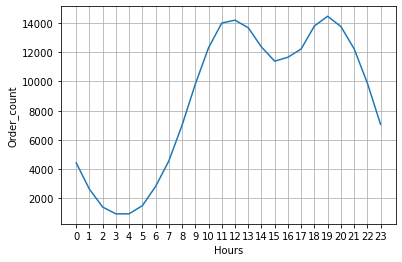

In [111]:
hour = sales_2019["Hour"].unique()

hour.sort()

plt.plot(hour,sales_hour["Quantity Ordered"])
plt.grid()
plt.xticks(hour)
plt.xlabel("Hours")
plt.ylabel("Order_count")
plt.show()

# Recommendation is to have advertisment around 11 am to 7pm

#### Question 4: What products are most often sold together?

In [113]:

df = sales_2019[sales_2019['Order ID'].duplicated(keep=False)]


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\rohai\AppData\Local\Temp\ipykernel_868\951567191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [114]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

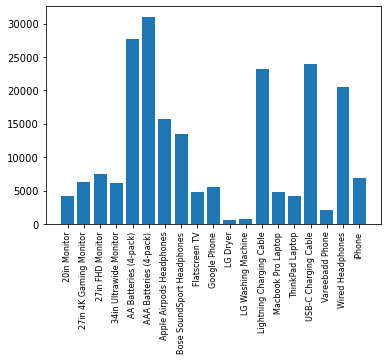

In [115]:
product_group = sales_2019.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\rohai\AppData\Local\Temp\ipykernel_868\2444290929.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\rohai\AppData\Local\Temp\ipykernel_868\2444290929.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


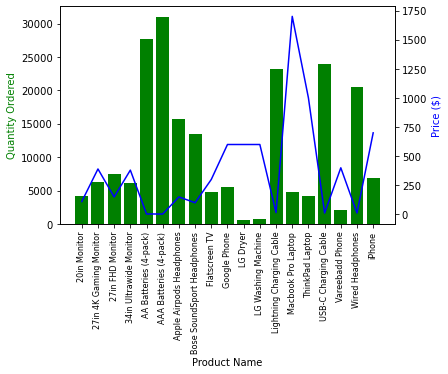

In [116]:

prices = sales_2019.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()